In [1]:
import lava

c:\Users\21520\anaconda3\Lib\site-packages\torchtext\data\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\21520\PycharmProjects\LAVA\LAVA\otdd\pytorch\utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
from preact_resnet import PreActResNet18
import torch
print(torch.cuda.is_available())  # Should return True if GPU is available
import os
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torch.autograd import Variable

import matplotlib.pyplot as plt
from torch import tensor
from torchvision import datasets, transforms
import pandas as pd
import numpy as n

from torch.utils.data import Dataset, TensorDataset, DataLoader

True


In [3]:
#from preact_resnet import PreActResNet18
import torch
print(torch.cuda.is_available())  # Should return True if GPU is available

True


In [4]:
import torch

In [5]:
print(torch.__version__)

2.3.0


In [6]:
cuda_num = 0
import torchvision
print(torchvision.__version__)
import torch
print(torch.__version__)
import os
#os.environ["CUDA_VISIBLE_DEVICES"]=str(cuda_num)
#print(os.environ["CUDA_VISIBLE_DEVICES"])
#torch.cuda.set_device(cuda_num)
print("Cuda device: ", torch.cuda.current_device())
print("cude devices: ", torch.cuda.device_count())

0.18.0
2.3.0
Cuda device:  0
cude devices:  1


In [7]:
device = torch.device('cuda:' + str(cuda_num) if torch.cuda.is_available() else 'cpu')
print(device)
training_size = 50
valid_size = 20
resize = 32
portion = 0.3

cuda:0


In [8]:
net_test = PreActResNet18()
net_test = net_test.to(device)
feature_extractor_name = 'preact_resnet18_test_mnist.pth'
net_test.load_state_dict(torch.load('checkpoint/'+feature_extractor_name, map_location=torch.device('cpu')))
net_test.eval()

PreActResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (layer1): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (1): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
  )
  (layer2): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d

In [4]:
def modify_for_mnist(model):
    model.linear = nn.Linear(512, 10)

In [5]:
modify_for_mnist(net_test)

In [6]:
net_test.eval()


PreActResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (layer1): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (1): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
  )
  (layer2): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d

In [9]:
loaders, shuffle_ind = lava.load_data_corrupted(corrupt_type='shuffle', dataname='MNIST', resize=resize,
                                        training_size=training_size, test_size=valid_size, currupt_por=portion)

MNIST
Currrent label: 9
New label: 2 
TRAINNNN label:  tensor(2)
TRAINNNN:  (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]]), 2)
Currrent label: 9
New label: 4 
TRAINNNN label:  tensor(4)
TRAINNNN:  (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, 

In [12]:
print(loaders['train'])

In [17]:
ktr = None

In [9]:
for batch in loaders['train']:
    print(batch[0][0].size())
    ktr = batch[0][0]
    break

torch.Size([1, 32, 32])


In [36]:
!pip install pillow

In [38]:
import torch
from PIL import Image
import numpy as np

In [39]:
np_array = ktr.numpy()
np_array = np_array.squeeze()
image = Image.fromarray(np.uint8(np_array * 255), 'L')
image.save('output_image.png')
image.show()

In [40]:
print(np_array.shape)

(32, 32)


In [41]:
rgb = ktr.repeat(3,1,1)

In [42]:
print(rgb.size())

torch.Size([3, 32, 32])


In [25]:
count = 0 
for i in range(0,32):
    for j in range(0,32):
        #print(ktr[0,i,j])
        count = count + (ktr[0,i,j]!=tensor(-0.4242))
print(count)

tensor(1024)


In [13]:
net_test = None

In [10]:
net_test = PreActResNet18()
net_test = net_test.to(device)
net_test.load_state_dict(torch.load('checkpoint/'+'preact_resnet18_test_mnist.pth', map_location='cuda:0'))
net_test.eval()

PreActResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (layer1): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (1): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
  )
  (layer2): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d

In [10]:
embedder = net_test.to(device)
embedder.fc = torch.nn.Identity()

In [11]:
print(embedder)

PreActResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (layer1): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (1): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
  )
  (layer2): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d

In [12]:
for p in embedder.parameters():
    p.requires_grad = False

In [13]:
from otdd.pytorch.distance_fast import DatasetDistance, FeatureCost

In [14]:
feature_cost = FeatureCost(src_embedding = embedder,
                               src_dim = (1, resize,resize),
                               tgt_embedding = embedder,
                               tgt_dim = (1, resize,resize),
                               p = 2,
                               device='cuda')

In [15]:
import pickle
with open("save_x1y1x2y2.txt", "rb") as f:
    loaded_data = pickle.load(f)
X1, Y1, X2, Y2 = loaded_data

# Now you can use X1, Y1, X2, and Y2 in your code
print(X1.shape)  # Example usage

torch.Size([50, 1024])


In [16]:
print(X1[0][0])

tensor(-0.4242)


In [17]:
def _get_batch_shape(b):
    if b.ndim == 3: return b.shape
    elif b.ndim == 2: return (1,*b.shape)
    elif b.ndim == 1: return (1,1,b.shape[0])

In [18]:
B1, N1, D1 = _get_batch_shape(X1)

In [19]:
print(B1, N1, D1)

1 50 1024


In [20]:
src_dim = (1, 32, 32)

In [21]:
X_test = X1.view(-1, *src_dim)

In [22]:
print(X_test.shape)

torch.Size([50, 1, 32, 32])


In [23]:
X_test_rgb = X_test.repeat(1, 3, 1, 1)

In [24]:
print(X_test_rgb.size())

torch.Size([50, 3, 32, 32])


In [25]:
X_test_rgb = X_test_rgb.to(device)

In [26]:
X_test_rgb.size()

torch.Size([50, 3, 32, 32])

In [27]:
embedder.to(device)

PreActResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (layer1): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (1): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
  )
  (layer2): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d

In [28]:
X_test_emb = embedder(X_test_rgb)

In [29]:
print(X_test_emb.size())

torch.Size([50, 100])


In [30]:
flattened_X1 = X_test_emb.reshape(B1, N1, -1)

In [31]:
print(flattened_X1)

tensor([[[  4.5680,  35.7887,  -0.4968,  ..., -24.5336, -30.4800, -24.2358],
         [ -1.0291,  14.3661,   0.8592,  ..., -15.6310, -18.3019, -15.5440],
         [  1.1676,  18.7959,  -5.3507,  ..., -21.4980, -27.0970, -21.4995],
         ...,
         [  0.4916,  14.6977,  -0.4040,  ..., -14.9157, -17.9280, -14.8729],
         [ -1.3570,  20.5337,   2.7240,  ..., -18.8162, -21.8036, -18.5932],
         [ -9.1459,  11.4589,  17.1523,  ...,  -9.8075,  -6.5931,  -9.3166]]],
       device='cuda:0')


In [32]:
print(flattened_X1.size())

torch.Size([1, 50, 100])


In [33]:
print(X2.shape)

torch.Size([17, 1024])


In [34]:
B2, N2, D2 = _get_batch_shape(X2)
print(B2, N2, D2)
tgt_dim = (1, 32, 32)
X_test_1 = X2.view(-1, *tgt_dim)
print(X_test_1.shape)
X_test_rgb_1 = X_test_1.repeat(1, 3, 1, 1)
print(X_test_rgb_1.size())
X_test_rgb_1 = X_test_rgb_1.to(device)
print(X_test_rgb_1.size())
X_test_emb_1 = embedder(X_test_rgb_1)
print(X_test_emb_1.size())
flattened_X2 = X_test_emb_1.reshape(B2, N2, -1)
print(flattened_X2.size())

1 17 1024
torch.Size([17, 1, 32, 32])
torch.Size([17, 3, 32, 32])
torch.Size([17, 3, 32, 32])
torch.Size([17, 100])
torch.Size([1, 17, 100])


In [35]:
import geomloss
c = geomloss.utils.squared_distances(flattened_X1, flattened_X2) / 2

In [36]:
_orig_device = flattened_X1.device
c.to(_orig_device)

tensor([[[1.2867e+03, 1.0123e+04, 3.3894e+03, 2.2643e+04, 1.8316e+04,
          1.6929e+03, 1.5964e+03, 1.4539e+04, 5.8768e+03, 6.0583e+03,
          1.0668e+04, 9.8217e+03, 2.2888e+03, 1.4502e+04, 3.2149e+03,
          2.4505e+03, 2.2549e+04],
         [1.1393e+04, 8.6758e+00, 2.4432e+03, 2.4312e+03, 1.7133e+03,
          4.2093e+03, 6.8048e+03, 3.6053e+02, 1.0514e+03, 9.3430e+02,
          6.5640e+02, 1.1870e+02, 5.7243e+03, 3.0782e+03, 6.9086e+03,
          3.9213e+03, 3.0672e+03],
         [4.9633e+03, 3.0817e+03, 1.3474e+03, 1.1285e+04, 9.3767e+03,
          1.2645e+02, 1.4237e+03, 5.6676e+03, 1.5117e+03, 1.6831e+03,
          4.5970e+03, 3.3720e+03, 5.6225e+02, 8.8407e+03, 1.1159e+03,
          1.7912e+02, 1.2387e+04],
         [5.2531e+02, 1.4524e+04, 5.0961e+03, 2.6884e+04, 2.0289e+04,
          6.0954e+03, 5.6210e+03, 1.9096e+04, 9.3927e+03, 9.0594e+03,
          1.2565e+04, 1.3099e+04, 8.2856e+03, 1.3663e+04, 1.0490e+04,
          7.6179e+03, 2.4402e+04],
         [1.2070e+03

In [37]:
print(c.size())

torch.Size([1, 50, 17])


In [76]:
for batch in loaders['train']:
    print(batch[0].size())
    break

torch.Size([50, 1, 32, 32])


In [77]:
for batch in loaders['test']:
    print(batch[0].size())
    break

torch.Size([20, 1, 32, 32])


In [39]:
dist = DatasetDistance(loaders['train'], loaders['test'], X1=X1, X2=X2, Y1=Y1, Y2=Y2,
                           inner_ot_method = 'exact',
                           debiased_loss = True,
                           feature_cost = c,
                           λ_x=1.0, λ_y=1.0,
                           sqrt_method = 'spectral',
                           sqrt_niters=10,
                           precision='single',
                           p = 2, entreg = 1e-1,
                           device='cuda')

In [52]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from otdd.pytorch.wasserstein import pwdist_exact

In [42]:
symmetric_tasks = False
inner_ot_p = 2
inner_ot_loss='sinkhorn'
inner_ot_debiased = False
inner_ot_entreg = 0.1

In [43]:
from functools import partial

In [44]:
pwdist = partial(pwdist_exact,
                symmetric=symmetric_tasks,
                p = inner_ot_p,
                loss = inner_ot_loss,
                debias=inner_ot_debiased,
                entreg = inner_ot_entreg,
                cost_function = c,
                device=device)

In [66]:
print(Y2)

tensor([14, 13, 15, 12, 12, 14, 11, 12, 11, 14, 15, 13, 10, 15, 10, 10, 12])


In [70]:
c1 = torch.unique(Y1)
c2 = torch.unique(Y1)
n1, n2 = len(c1), len(c2)

In [58]:
print(c1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [65]:
print(c2)

tensor([10, 11, 12, 13, 14, 15])


In [64]:
X_label = X1[Y1 == c1[0]]

In [95]:
print(X_label)

tensor([[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]])


In [ ]:
X_label1 = X2[Y2 == c2[0]]

In [62]:
print(X_label.size())

torch.Size([4, 1024])


In [63]:
for i in range(10):
    X_label = X1[Y1 == c1[i]]
    print(X_label.size())

torch.Size([4, 1024])
torch.Size([3, 1024])
torch.Size([7, 1024])
torch.Size([5, 1024])
torch.Size([9, 1024])
torch.Size([7, 1024])
torch.Size([3, 1024])
torch.Size([2, 1024])
torch.Size([5, 1024])
torch.Size([5, 1024])


In [ ]:
self.feature_cost = partial(FeatureCost,
                                   src_emb = self.src_embedding,
                                   src_dim = (3,32,32),
                                   tgt_emb = self.tgt_embedding,
                                   tgt_dim = (3,32,32),
                                   p = self.p, device=self.device)

In [ ]:
pwdist = partial(pwdist_exact,
                             symmetric=self.symmetric_tasks,
                             p = self.inner_ot_p,
                             loss = self.inner_ot_loss,
                             debias=self.inner_ot_debiased,
                             entreg = self.inner_ot_entreg,
                             cost_function = self.feature_cost,
                             device=self.device)

In [99]:
distance = geomloss.SamplesLoss(
            loss='sinkhorn', p=2,
            cost=c,
            debias=False,
            blur=0.1**(1 / p),
        )

In [68]:
import itertools
pairs = list(itertools.combinations(range(n1), 2))

In [72]:
from tqdm.autonotebook import tqdm


In [100]:
pbar = tqdm(pairs, leave=False)
D = torch.zeros((n1, n2), device = device, dtype=X1.dtype)


  0%|          | 0/45 [00:00<?, ?it/s]

In [101]:
print(D)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')


In [78]:
distance = geomloss.SamplesLoss(
            loss='sinkhorn', p=2,
            debias=False,
            blur=0.1**(1 / p),
        )

In [90]:
import numpy as np

In [97]:
import numpy as np

# Example tensors on a CUDA device
x = torch.randn(10, 3, requires_grad=True)
y = torch.randn(20, 3)

# Convert CUDA tensors to NumPy arrays
x_cpu = x.cpu().detach().numpy()  # Use .detach() for tensors that require gradients
y_cpu = y.cpu().numpy()

print("x as NumPy array:", x_cpu)
print("y as NumPy array:", y_cpu)

# Convert NumPy arrays back to CUDA tensors
x_tensor_cuda = torch.tensor(x_cpu, requires_grad=True)
y_tensor_cuda = torch.tensor(y_cpu)

print("x as PyTorch tensor on CUDA:", x_tensor_cuda)
print("y as PyTorch tensor on CUDA:", y_tensor_cuda)

x as NumPy array: [[ 0.23637404 -1.0222394   0.23795809]
 [-0.4118512   0.5532744   1.4319055 ]
 [-0.64027804  0.26863298  1.0842471 ]
 [ 1.1066191   0.6303161  -0.01383621]
 [-0.17073889  1.0128652   0.88475263]
 [-0.6653725  -0.7384063   0.8844492 ]
 [ 0.21793933 -0.9558697   0.60141236]
 [-0.2026215   1.4778774  -0.69676685]
 [-1.1358181  -0.5682623   2.5295017 ]
 [ 0.5794923   0.1590776   1.1077752 ]]
y as NumPy array: [[-2.0398054  -0.10267979 -0.96329546]
 [ 2.6238248   1.0282892   0.89757043]
 [-1.9531504   2.2250667   1.2123191 ]
 [ 0.39188144  0.47344908  0.8685519 ]
 [ 0.13422154  0.5251658  -1.1500561 ]
 [-0.8348974  -1.806435    0.7070032 ]
 [ 0.6554972   0.5630011   0.6749198 ]
 [-1.2917346   2.5334623  -0.978294  ]
 [ 0.28702423  0.1525463  -0.35922626]
 [-0.19794202 -0.04627462 -1.2972354 ]
 [-0.6789175  -1.1342194  -0.6889773 ]
 [-0.68138576 -1.0734137   1.4142936 ]
 [-1.2484815   0.4062807  -0.12571701]
 [-0.18478991  1.9796231   1.2416492 ]
 [-1.2980149  -0.3421969   

In [98]:
co = distance(x_tensor_cuda.to(device),y_tensor_cuda.to(device))

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [102]:
for i, j in pbar:
    print(i,j)
    D[i, j] = distance(X1[Y1==c1[i]].to(device), X1[Y1==c2[j]].to(device)).item()

0 1


TypeError: 'Tensor' object is not callable

In [77]:
print(X1[Y1==c1[0]].size(), X1[Y1==c2[1]].size())

torch.Size([4, 1024]) torch.Size([3, 1024])


In [76]:
distance(X1[Y1==c1[0]].to(device), X1[Y1==c2[1]].to(device))

TypeError: 'Tensor' object is not callable

In [54]:
DYY1 = pwdist(X1, Y1)

10 10
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


  0%|          | 0/45 [00:00<?, ?it/s]

0 1
This is awkward. Distance computation failed. Geomloss is hard to debugBut here's a few things that might be happening:  1. Too many samples with this label, causing memory issues 2. Datatype errors, e.g., if the two datasets have different type


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [40]:
dual_sol = dist.dual_sol(maxsamples = training_size, return_coupling = True)

Calculate the same thing again...


  0%|          | 0/45 [00:00<?, ?it/s]

This is awkward. Distance computation failed. Geomloss is hard to debugBut here's a few things that might be happening:  1. Too many samples with this label, causing memory issues 2. Datatype errors, e.g., if the two datasets have different type


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [104]:
dual_sol, trained_with_flag = lava.compute_dual(net_test, loaders['train'], loaders['test'],
                                                training_size, shuffle_ind, resize=resize, device = device)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

10 10
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
cost function: <otdd.pytorch.distance_fast.FeatureCost object at 0x000001379CC37750>
cost function: <otdd.pytorch.distance_fast.FeatureCost object at 0x000001379CC37750>


  0%|          | 0/45 [00:00<?, ?it/s]

0 1
1 4 1024
Batchifying feature distance computation
This is awkward. Distance computation failed. Geomloss is hard to debugBut here's a few things that might be happening:  1. Too many samples with this label, causing memory issues 2. Datatype errors, e.g., if the two datasets have different type


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [18]:
import os
os.getcwd()

'C:\\Users\\21520\\PycharmProjects\\LAVA'

In [19]:
import importlib
import lava
importlib.reload(lava)

<module 'lava' from 'C:\\Users\\21520\\PycharmProjects\\LAVA\\lava.py'>

 Volume in drive C has no label.
 Volume Serial Number is BB40-D6E0

 Directory of C:\Users\21520\PycharmProjects\LAVA



File Not Found


In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.repeat(1, 3, 1, 1)  # Convert grayscale to RGB
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')

In [105]:
import pickle
with open("save_x1y1x2y2.txt", "rb") as f:
    loaded_data = pickle.load(f)
X1, Y1, X2, Y2 = loaded_data

# Now you can use X1, Y1, X2, and Y2 in your code
print(X1.shape)  # Example usage
print(X2.shape)
print(Y1.shape)
print(Y2.shape)
c1 = torch.unique(Y1)
c2 = torch.unique(Y2)
n1, n2 = len(c1), len(c2)
print(n1, n2)

torch.Size([50, 1024])
torch.Size([17, 1024])
torch.Size([50])
torch.Size([17])
10 6


In [108]:
loaders, shuffle_ind = lava.load_data_corrupted(corrupt_type='shuffle', dataname='MNIST', resize=resize,
                                        training_size=training_size, test_size=valid_size, currupt_por=portion)

MNIST
Currrent label: 9
New label: 2 
TRAINNNN label:  tensor(2)
TRAINNNN:  (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]]), 2)
Currrent label: 9
New label: 4 
TRAINNNN label:  tensor(4)
TRAINNNN:  (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, 

In [114]:
for batch in loaders['train']:
    print(len(batch[1]))

50


In [115]:
for batch in loaders['test']:
    print(len(batch[1]))

20


In [103]:
feature_cost = FeatureCost(src_embedding = embedder,
                               src_dim = (1, resize,resize),
                               tgt_embedding = embedder,
                               tgt_dim = (1, resize,resize),
                               p = 2,
                               device='cuda')

In [134]:
dist = DatasetDistance(loaders['train'], loaders['test'],
                           inner_ot_method = 'exact',
                           debiased_loss = True,
                           feature_cost = feature_cost,
                           λ_x=1.0, λ_y=1.0,
                           sqrt_method = 'spectral',
                           sqrt_niters=10,
                           precision='single',
                           p = 2, entreg = 1e-1,
                           device='cuda')

In [135]:
print(dist.V1, dist.V2)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) tensor([0, 1, 2, 4, 6, 8])


In [128]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
dist._load_datasets(device=device)

  0%|          | 0/1 [00:00<?, ?it/s]

load full dataset: torch.Size([50])


  0%|          | 0/1 [00:00<?, ?it/s]

load full dataset: torch.Size([17])


In [137]:
print(dist.X1.shape, dist.X2.shape)

torch.Size([50, 1024]) torch.Size([17, 1024])


In [138]:
print(dist.Y1.shape, dist.Y2.shape)

torch.Size([50]) torch.Size([17])


In [139]:
print(dist.Y2)

tensor([14, 13, 15, 12, 12, 14, 11, 12, 11, 14, 15, 13, 10, 15, 10, 10, 12])


In [140]:
for batch in dist.D1:
    print(len(batch[0]))
for batch in dist.D2:
    print(len(batch[1]))

50
20


In [144]:
W = dist._get_label_distances().to(torch.device(device))

10 10
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
cost function:


  0%|          | 0/45 [00:00<?, ?it/s]

0 1
huhu: torch.Size([4, 1024]) torch.Size([3, 1024])
1 4 1024
torch.Size([1, 4, 100])
1 3 1024
torch.Size([1, 3, 100])
torch.Size([1, 4, 3])
1 3 1024
torch.Size([1, 3, 100])
1 4 1024
torch.Size([1, 4, 100])
torch.Size([1, 3, 4])
was: tensor(727.9841, device='cuda:0')
0 2
huhu: torch.Size([4, 1024]) torch.Size([7, 1024])
1 4 1024
torch.Size([1, 4, 100])
1 7 1024
torch.Size([1, 7, 100])
torch.Size([1, 4, 7])
1 7 1024
torch.Size([1, 7, 100])
1 4 1024
torch.Size([1, 4, 100])
torch.Size([1, 7, 4])
was: tensor(5487.4429, device='cuda:0')
0 3
huhu: torch.Size([4, 1024]) torch.Size([5, 1024])
1 4 1024
torch.Size([1, 4, 100])
1 5 1024
torch.Size([1, 5, 100])
torch.Size([1, 4, 5])
1 5 1024
torch.Size([1, 5, 100])
1 4 1024
torch.Size([1, 4, 100])
torch.Size([1, 5, 4])
was: tensor(9170.8467, device='cuda:0')
0 4
huhu: torch.Size([4, 1024]) torch.Size([9, 1024])
1 4 1024
torch.Size([1, 4, 100])
1 9 1024
torch.Size([1, 9, 100])
torch.Size([1, 4, 9])
1 9 1024
torch.Size([1, 9, 100])
1 4 1024
torch.S

  0%|          | 0/15 [00:00<?, ?it/s]

0 1
huhu: torch.Size([3, 1024]) torch.Size([2, 1024])
1 3 1024
torch.Size([1, 3, 100])
1 2 1024
torch.Size([1, 2, 100])
torch.Size([1, 3, 2])
1 2 1024
torch.Size([1, 2, 100])
1 3 1024
torch.Size([1, 3, 100])
torch.Size([1, 2, 3])
was: tensor(1421.4941, device='cuda:0')
0 2
huhu: torch.Size([3, 1024]) torch.Size([4, 1024])
1 3 1024
torch.Size([1, 3, 100])
1 4 1024
torch.Size([1, 4, 100])
torch.Size([1, 3, 4])
1 4 1024
torch.Size([1, 4, 100])
1 3 1024
torch.Size([1, 3, 100])
torch.Size([1, 4, 3])
was: tensor(12837.8008, device='cuda:0')
0 3
huhu: torch.Size([3, 1024]) torch.Size([2, 1024])
1 3 1024
torch.Size([1, 3, 100])
1 2 1024
torch.Size([1, 2, 100])
torch.Size([1, 3, 2])
1 2 1024
torch.Size([1, 2, 100])
1 3 1024
torch.Size([1, 3, 100])
torch.Size([1, 2, 3])
was: tensor(5481.5630, device='cuda:0')
0 4
huhu: torch.Size([3, 1024]) torch.Size([3, 1024])
1 3 1024
torch.Size([1, 3, 100])
1 3 1024
torch.Size([1, 3, 100])
torch.Size([1, 3, 3])
1 3 1024
torch.Size([1, 3, 100])
1 3 1024
torch

  0%|          | 0/60 [00:00<?, ?it/s]

0 0
huhu: torch.Size([4, 1024]) torch.Size([3, 1024])
1 4 1024
torch.Size([1, 4, 100])
1 3 1024
torch.Size([1, 3, 100])
torch.Size([1, 4, 3])
1 3 1024
torch.Size([1, 3, 100])
1 4 1024
torch.Size([1, 4, 100])
torch.Size([1, 3, 4])
was: tensor(1134.1279, device='cuda:0')
0 1
huhu: torch.Size([4, 1024]) torch.Size([2, 1024])
1 4 1024
torch.Size([1, 4, 100])
1 2 1024
torch.Size([1, 2, 100])
torch.Size([1, 4, 2])
1 2 1024
torch.Size([1, 2, 100])
1 4 1024
torch.Size([1, 4, 100])
torch.Size([1, 2, 4])
was: tensor(876.6338, device='cuda:0')
0 2
huhu: torch.Size([4, 1024]) torch.Size([4, 1024])
1 4 1024
torch.Size([1, 4, 100])
1 4 1024
torch.Size([1, 4, 100])
torch.Size([1, 4, 4])
1 4 1024
torch.Size([1, 4, 100])
1 4 1024
torch.Size([1, 4, 100])
torch.Size([1, 4, 4])
was: tensor(7223.5078, device='cuda:0')
0 3
huhu: torch.Size([4, 1024]) torch.Size([2, 1024])
1 4 1024
torch.Size([1, 4, 100])
1 2 1024
torch.Size([1, 2, 100])
torch.Size([1, 4, 2])
1 2 1024
torch.Size([1, 2, 100])
1 4 1024
torch.S

In [145]:
print(W.shape)

torch.Size([16, 16])


In [146]:
W

tensor([[    0.0000,   727.9841,  5487.4429,  9170.8467,  4899.0498,  3434.0608,
          3555.6626,  7825.9287,  1373.7068,  2698.0107,  1134.1279,   876.6338,
          7223.5078,  2394.4346,  2170.8447,  3522.3743],
        [  727.9841,     0.0000,  5782.2881,  9831.0566,  4518.3906,  3782.0122,
          3873.9246,  8309.8398,   997.8967,  2574.4294,  1594.6130,   116.0882,
          7542.1660,  2896.0273,  2664.2661,  3446.1055],
        [ 5487.4429,  5782.2881,     0.0000,  1967.5338,  3708.6943,  6503.2144,
         13226.7168,  2192.8142,  4360.4814,  2390.7476, 11127.5049,  6598.5044,
          2583.0576,  2822.5771,  5852.9790,  1093.8008],
        [ 9170.8467,  9831.0566,  1967.5338,     0.0000,  8097.4526, 10033.0410,
         17845.8867,  2920.1614,  7288.6279,  6288.4907, 16614.9238, 10142.2119,
          4277.8389,  6031.0449,  9948.1074,  2471.9341],
        [ 4899.0498,  4518.3906,  3708.6943,  8097.4526,     0.0000,  3303.1108,
          7672.2500,  9422.2441,  3425.

In [147]:
W = dist._get_label_distances().to(torch.device(device))

In [148]:
cost_geomloss = partial(
                batch_augmented_cost,
                W=W,
                λ_x=dist.λ_x,
                λ_y=dist.λ_y,
                feature_cost=dist.feature_cost
            )

loss = geomloss.SamplesLoss(
                loss=dist.loss, p=dist.p,
                cost=cost_geomloss,
                debias=dist.debiased_loss,
                blur=dist.entreg**(1 / dist.p),
                backend='tensorized'
            )

In [152]:
maxsamples = None

In [153]:
if maxsamples and dist.X1.shape[0] > maxsamples:
    idxs_1 = sorted(np.random.choice(
    dist.X1.shape[0], maxsamples, replace=False))
else:
    idxs_1 = np.s_[:]  # hack to get a full slice

if maxsamples and dist.X2.shape[0] > maxsamples:
    idxs_2 = sorted(np.random.choice(
    dist.X2.shape[0], maxsamples, replace=False))
else:
    idxs_2 = np.s_[:]  # hack to get a full slice
Z1 = torch.cat((dist.X1[idxs_1],
                dist.Y1[idxs_1].type(dist.X1.dtype).unsqueeze(1)), -1)
Z2 = torch.cat((dist.X2[idxs_2],
                dist.Y2[idxs_2].type(dist.X2.dtype).unsqueeze(1)), -1)
Z1 = Z1.to(device)
Z2 = Z2.to(device)

In [155]:
with torch.no_grad():
    loss.debias = False
    loss.potentials = True
    

In [154]:
print(Z1.shape, Z2.shape)

torch.Size([50, 1025]) torch.Size([17, 1025])


In [157]:
F_i, G_j = loss(Z1, Z2)

Z1 shape in batch:  torch.Size([1, 50, 1025])
Z2 shape in batch:  torch.Size([1, 17, 1025])
1 50 1024
torch.Size([1, 50, 100])
1 17 1024
torch.Size([1, 17, 100])
torch.Size([1, 50, 17])
torch.Size([1, 50, 17])
Gia tri M: tensor([[[110, 109, 111, 108, 108, 110, 107, 108, 107, 110, 111, 109, 106, 111,
          106, 106, 108],
         [158, 157, 159, 156, 156, 158, 155, 156, 155, 158, 159, 157, 154, 159,
          154, 154, 156],
         [ 62,  61,  63,  60,  60,  62,  59,  60,  59,  62,  63,  61,  58,  63,
           58,  58,  60],
         [ 78,  77,  79,  76,  76,  78,  75,  76,  75,  78,  79,  77,  74,  79,
           74,  74,  76],
         [ 78,  77,  79,  76,  76,  78,  75,  76,  75,  78,  79,  77,  74,  79,
           74,  74,  76],
         [ 94,  93,  95,  92,  92,  94,  91,  92,  91,  94,  95,  93,  90,  95,
           90,  90,  92],
         [ 30,  29,  31,  28,  28,  30,  27,  28,  27,  30,  31,  29,  26,  31,
           26,  26,  28],
         [ 78,  77,  79,  76,  76,  7

In [163]:
π = [F_i, G_j]
dual_sol = π
for i in range(len(dual_sol)):
    dual_sol[i] = dual_sol[i].to('cpu')

In [159]:
from lava import train_with_corrupt_flag, get_indices

In [160]:
train_indices = get_indices(loaders['train'])
trained_with_flag = train_with_corrupt_flag(loaders['train'], shuffle_ind, train_indices)

inspected: 10, found: 6 detection rate: 0.40 baseline: 1.8
inspected: 20, found: 8 detection rate: 0.53 baseline: 3.6
inspected: 30, found: 11 detection rate: 0.73 baseline: 5.4
inspected: 40, found: 14 detection rate: 0.93 baseline: 7.2


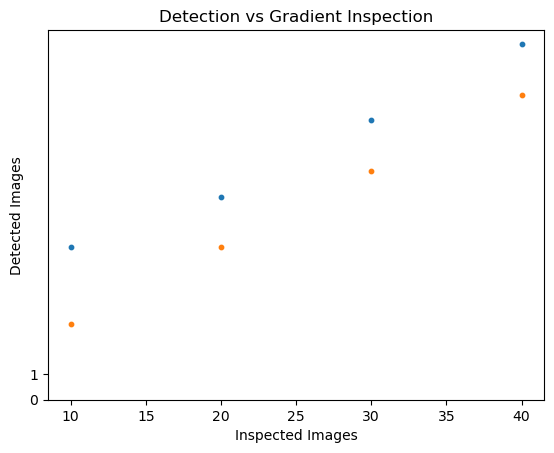

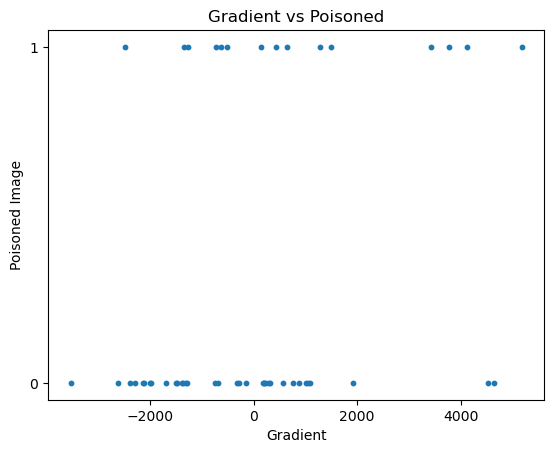

Number of poisoned images:  15  out of 10000.
last index of poison 47


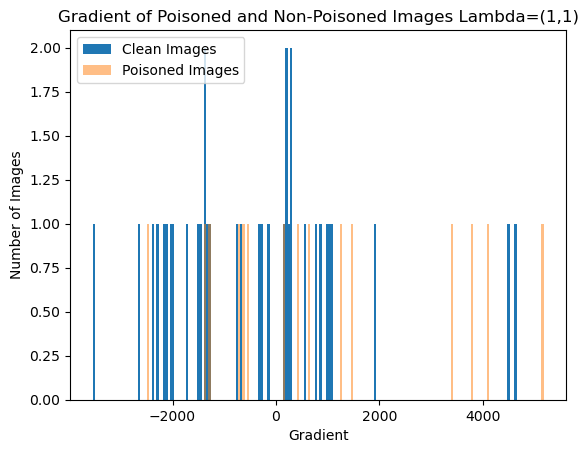

In [164]:
%matplotlib inline
calibrated_gradient = lava.compute_values_and_visualize(dual_sol, trained_with_flag, training_size, portion)